In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import linalg, integrate, misc
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

In [2]:
#test1:
kappa = 2.3 * 1e-2
f = lambda x, t: x + np.sin(3*t)
time = 1            #seconds
length = 3          #meters
num_time_pts = 100
num_length_pts = 145 #bad 145, good 100 when above is 100
mu_1 = lambda t: t/4
mu_2 = lambda t: 3.5*t
mu = lambda x: abs(x*(length-x))

In [3]:
#test2:
kappa = 2.3 * 1e-1  #iron
f = lambda x, t: x + np.sin(3*t)
time = 1            #seconds
length = 3          #meters
num_time_pts = 1000
num_length_pts = 100 #1000 is bad

mu_1 = lambda t: float(0)
mu_2 = lambda t: float(0)
mu = lambda x: np.sin(np.pi*x)

In [4]:
#test3
kappa = 1e-1
f = lambda x, t: float(0)
time = 1            #seconds
length = 3          #meters
num_time_pts = 1000 
num_length_pts = 200  #70 bad, 100 good when above is 100

mu_1 = lambda t: (t*2)**2/4
mu_2 = lambda t: -(t*2)**2/4 + (length)**2/4
mu = lambda x: x**2/4

In [5]:
def explicit():
    U = np.zeros((num_length_pts, num_time_pts))

    for i in range(num_length_pts):
        U[i, 0] = mu(length_grid[i])
    
    for i in range(num_time_pts):
        U[0, i] = mu_1(time_grid[i])
        U[-1, i] = mu_2(time_grid[i])

    for j in range(1, num_time_pts):
        for i in range(1, num_length_pts-1):
            U[i, j] = tau * kappa * (U[i+1, j-1] - 2*U[i, j-1] + U[i-1, j-1]) / (h**2) \
                        + tau * f(length_grid[i], time_grid[j-1]) \
                        + U[i, j-1]

    return U

In [6]:
def implicit():
    U = np.zeros((num_length_pts, num_time_pts))

    for i in range(num_length_pts):
        U[i, 0] = mu(length_grid[i])
    
    for i in range(num_time_pts):
        U[0, i] = mu_1(time_grid[i])
        U[-1, i] = mu_2(time_grid[i])
    
    for j in range(1, num_time_pts):
        A = np.zeros((3, num_length_pts-2))
        b = np.zeros(num_length_pts-2)

        coeff = tau*kappa/(h**2)

        A[0, 1:] = -coeff
        A[1, :] = 1 + 2*coeff
        A[2, 1:-1] = -coeff
        
        b[0] = tau*f(length_grid[1], time_grid[j]) + U[1,j-1] + coeff*U[0,j]
        for i in range(1, b.size-1):
            b[i] = tau*f(length_grid[i+1], time_grid[j]) + U[i+1,j-1]
        b[-1] = tau*f(length_grid[num_length_pts-2], time_grid[j]) + U[num_length_pts-2,j-1] + coeff*U[num_length_pts-1,j]

        U[1:-1, j] = linalg.solve_banded((1, 1), A, b)

    return U


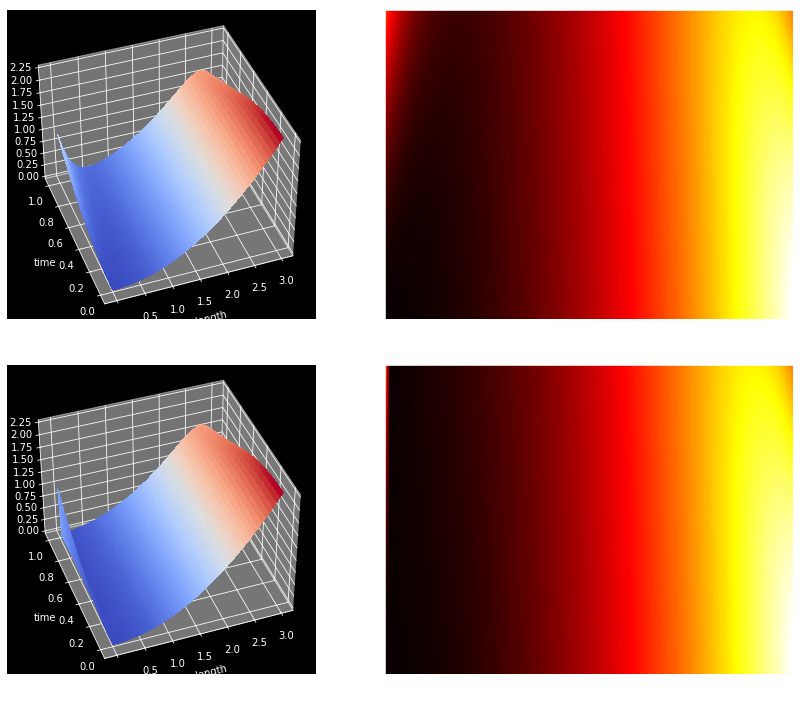

In [7]:
length_grid, h = np.linspace(0, length, num_length_pts, retstep=True)
time_grid, tau = np.linspace(0, time, num_time_pts, retstep=True)

X_grid, Y_grid = np.meshgrid(length_grid, time_grid, indexing='ij')

fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222)

ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224)

U = explicit()
ax1.plot_surface(X_grid, Y_grid, U, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=1)
ax1.view_init(40, 250)
ax1.set_ylabel('time')
ax1.set_xlabel('length')

ax2.pcolormesh(X_grid, Y_grid, U, cmap=cm.hot, shading='auto')
ax2.set_ylabel('time')
ax2.set_xlabel('length')


U = implicit()
ax3.plot_surface(X_grid, Y_grid, U, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=1)
ax3.view_init(40, 250)
ax3.set_ylabel('time')
ax3.set_xlabel('length')

ax4.pcolormesh(X_grid, Y_grid, U, cmap=cm.hot, shading='auto')
ax4.set_ylabel('time')
ax4.set_xlabel('length')


fig.tight_layout()
plt.show()
#ax.set_title(title)